# B1 interactive filtering

In [1]:
cd qMRLab
startup

    startup at line 2 column 1
    startup at line 2 column 1
loading struct
loading io
loading statistics
loading optim
loading image


In [2]:
cmd = ['curl -L -o b1_map.zip https://osf.io/mw3sq/download/'];
[STATUS,MESSAGE] = unix(cmd);
unzip('b1_map.zip');

In [3]:
fn = fullfile('ResultsBank');
if ~exist(fn, 'dir')
    mkdir(fn);
end

In [4]:
clear all

Model = b1_dam;

% Format data structure so that they may be fit by the model
data = struct();
data.SFalpha = double(load_nii_data('SFalpha.nii.gz')); %load data
data.SF2alpha  = double(load_nii_data('SF2alpha.nii.gz'));

filtering_types = {'spline', 'polynomial', 'gaussian', 'median'};
filtering_dimensions = {'2D', '3D'};
filtering_orders = {2, 4, 6};

# octave_compatible = {'spline', 'polynomial'};
# Checks if it's octave
# cacheval = (exist ("OCTAVE_VERSION", "builtin") > 0)

for i= 1:length(filtering_types)
    filter_type= filtering_types{i};
    for j = 1: length(filtering_dimensions)
        dimension = filtering_dimensions{j};
        for k = 1: length(filtering_orders)
            order = filtering_orders{k};
            
            # adjust model for filtering
            Model.options.Smoothingfilter_Type = filter_type;
            Model.options.Smoothingfilter_Dimension = dimension;
            Model.options.Smoothingfilter_order = order;
            try 
                FitResults = FitData(data,Model);
            catch
                continue;
            end
            
            # save fit results in correct location on disk
            B1_raw = FitResults.B1map_raw;
            B1_filtered = FitResults.B1map_filtered;
            typepath = fullfile('ResultsBank', filter_type);
            mkdir(typepath, [dimension '\' num2str(order)]);
            try
                fulldestination = fullfile(typepath, [dimension '\' num2str(order) '\' 'B1_raw.mat']);
                save(fulldestination, 'B1_raw');
                fulldestination = fullfile(typepath, [dimension '\' num2str(order) '\' 'B1_filtered.mat']);
                save(fulldestination, 'B1_filtered');
            catch Message
                Message
                continue;
            end
            
        endfor
    endfor
endfor

Model.options.Smoothingfilter_Type = 'spline';
Model.options.Smoothingfilter_order = 2;
FitResults_spline = FitData(data,Model);

ans = 1
    load_nii_hdr>read_header at line 114 column 5
    load_nii_hdr at line 52 column 14
    load_nii at line 184 column 53
    load_nii_data at line 3 column 5
ans = 1
    load_nii_hdr>read_header at line 114 column 5
    load_nii_hdr at line 52 column 14
    load_nii at line 184 column 53
    load_nii_data at line 3 column 5
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
Elapsed time is 0.275061 seconds.
Operation has been completed: b1_dam
Message =

  scalar structure containing the fields:

    message = octave_base_value::save_ascii(): wrong type argument 'object'
    identifier = 
    stack =

      0x1 struct array containing the fields:

        file
        name
        line
        column
        scope
        context


=============== qMRLab::Fit ======================
Operation has been started: b1_dam
Elapsed time is 0.166464 seconds.
Operation has been completed: b1_dam
Message =

  scalar structure containing the fields:

  

=============== qMRLab::Fit ======================
Operation has been started: b1_dam
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
=============== qMRLab::Fit ======================
Operation has been started: b1_dam
Elapsed time is 0.0296919 seconds.
Operation has been completed: b1_dam
Message =

  scalar structure containing the fields:

    message = octave_base_value::save_ascii(): wrong type argument 'object'
    identifier = 
    stack =

      0x1 struct array containing the fields:

        file
        name
        line
        column
        scope
        context


=============== qMRLab::Fit ====

In [5]:
B1_raw = FitResults_spline.B1map_raw;
B1_filtered = FitResults_spline.B1map_filtered;

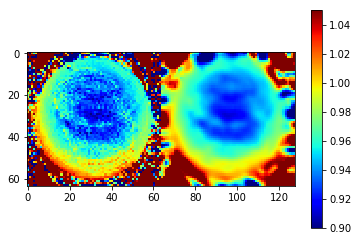

In [6]:
%get B1_raw --from Octave 
%get B1_filtered --from Octave 
%matplotlib inline

import matplotlib.pyplot as mpl
from matplotlib import cm
import numpy as np

mpl.imshow(np.concatenate((B1_raw, B1_filtered), axis=1))
mpl.clim(0.9,1.05)
mpl.colorbar()
mpl.set_cmap('jet')